# FOURIER SHOWDOWN

Здесь проживают все рукописные функции, с которыми мы будем иметь дело (медленно-быстрые прямо-обратные дискретные преобразования Фурье), а также наша волна - distort'нутый power chord!

In [12]:
import numpy as np
!pip install numpy!pip install matplotlibimport matplotlib.pyplot as plt
%matplotlib notebook
from ipywidgets import *

def dumb_fourier (x):
    s = len(x)
    n = 0
    res = np.zeros((s), dtype = np.complex)
    while (n < s):
        c1 = 0. + 0.0j
        for i in range (0, s):
          
            c1 += np.complex(x[i]) * np.exp(-1.j * 2 * np.pi * n * i/ s) 

        c1 /= s
        res[n] = c1
   
        n += 1
    return res

def dumb_ifft (c):
    s = len(c)
    n = 0
    y = np.zeros((s), dtype = np.float64)
    while (n < s):
        c1 = 0. + 0.0j
 
        for i in range (0, s):
            c1 += c[i] * np.exp(1.j  * 2 * np.pi * n * i/(s)) 
      
        y[n] = np.real(c1)
        n += 1          
    return y

def fft(x):
    s = len(x)
    
 
    
    if (s == 1): 
        return x
    
    E = fft(x[0::2])
    O =  fft(x[1::2])
    
    
    Xk = [E[i] + np.exp(-1.j * 2 * np.pi * i / s) * O[i] for i in range(s // 2)] + [E[i] - np.exp(-1.j * 2 * np.pi * i / s) * O[i] for i in range(s // 2)]
    return Xk

def rfft(x):
    s = len(x)
    
    if (s == 1): 
        return x
    
    E = fft(x[0::2])
    O =  fft(x[1::2])
    
    
    xk = [E[i] + np.exp(1.j * 2 * np.pi * i / s) * O[i] for i in range(s // 2)] + [E[i] - np.exp(1.j * 2 * np.pi * i / s) * O[i] for i in range(s // 2)]
    return (np.asarray(xk)/s)

def wave (x, fr):
    C3 =  fr * 2 * np.pi
    y = np.sin(C3 * x) + np.cos(2 * C3 * x) + np.sin(3 * C3 * x) + np.random.normal(0.5,0.1,size = len(x))  
    return y
    
    
    


Посмотрим, как ведет себя методика вычисления коэффициентов разложения через скалярные произведения (в народе известна как ДУБОЛОМНАЯ)

<IPython.core.display.Javascript object>


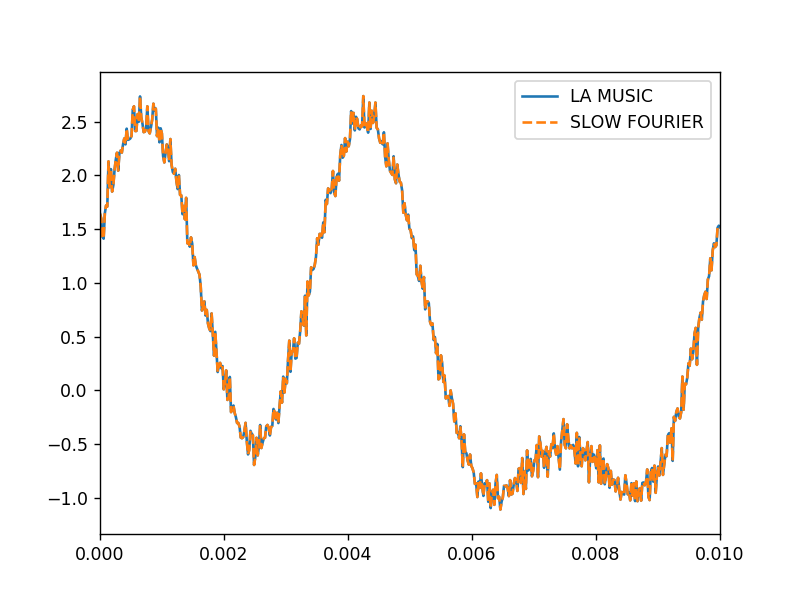

interactive(children=(FloatSlider(value=1.0, description='c', max=5.0, min=1.0), Output()), _dom_classes=('wid…

In [14]:
fr = 100.0
length = 1 / fr
sampling = 51200


ticks = np.int(sampling*length)

x = np.linspace(0, length, ticks)
y = wave(x, fr)

fourier = dumb_fourier(y)


ifft = dumb_ifft(fourier)

fig, ax = plt.subplots()
line, = ax.plot(x,y, label = 'LA MUSIC')
line1, = ax.plot(x, np.real(ifft), '--', markersize = 1000.0, label = 'SLOW FOURIER')
ax.legend()

def update1(c = 1.0):

    ticks = np.int(sampling * c / fr)
    
    x = np.linspace(0, c / fr, ticks)

    y = wave(x, fr)

    fourier = dumb_fourier(y)
    
    ifft = dumb_ifft(fourier)
    
    line.set_data(x,y)
    line1.set_data(x,np.real(ifft))
    ax.set_xlim(0, c / fr)
    ax.legend()
    fig.canvas.draw()

interact(update1, c = widgets.FloatSlider(min = 1.0, max = 5.0,step = 0.1,value=1.0));


Медленно и грустно. Теперь рассмотрим самый простой divide-and-conquer вариант FFT. Он привередливый - размер входных данных должен быть целой степенью двойки. Решение следующее - в зависимости от длины интервала будем менять частоту дискретизации. 

<IPython.core.display.Javascript object>


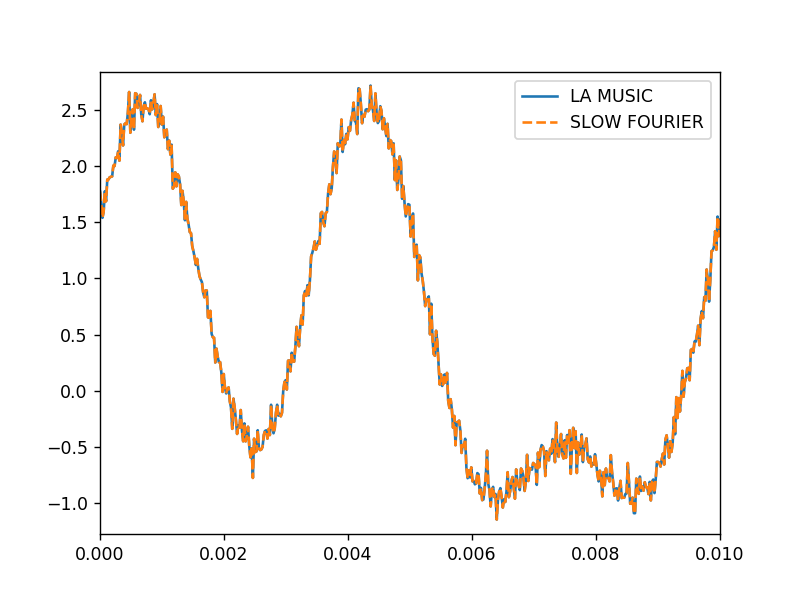

interactive(children=(FloatSlider(value=1.0, description='c', max=5.0, min=1.0), Output()), _dom_classes=('wid…

In [17]:
fr = 100.0
length = 1 / fr
sampling = 51200


C3 =  fr * 2 * np.pi
ticks = np.int(sampling*length)

x = np.linspace(0, length, ticks)
y = wave(x, fr)

fourier = fft(y)


iff = rfft(fourier)

fig3, ax3 = plt.subplots()
line4, = ax3.plot(x,y, label = 'LA MUSIC')
line5, = ax3.plot(x, np.real(iff), '--', markersize = 1000.0, label = 'SLOW FOURIER')
ax3.legend()

def update3(c = 1.0):
    sampling = 512 * fr / c
    
    ticks = np.int(sampling * c / fr)
    
    x = np.linspace(0, c / fr, ticks)

    y = wave(x,fr)

    fourier = dumb_fourier(y)
    
    ifft = dumb_ifft(fourier)
    
    line4.set_data(x,y)
    line5.set_data(x,np.real(ifft))
    ax3.set_xlim(0, c / fr)
    ax3.legend()
    fig3.canvas.draw()

interact(update3, c = widgets.FloatSlider(min = 1.0, max = 5.0,step = 0.1,value=1.0));

Слегка пободрее, но с коробочным, приведенным ниже, все же не сравнить.

<IPython.core.display.Javascript object>


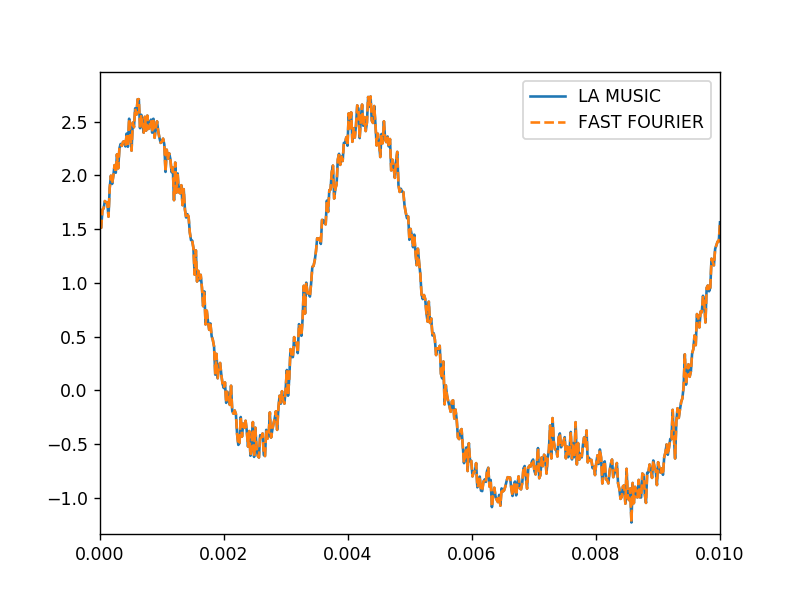

interactive(children=(FloatSlider(value=1.0, description='c', max=5.0, min=1.0), Output()), _dom_classes=('wid…

In [20]:
fr = 100.0
length = 1 / fr
sampling = 51200


C3 =  fr * 2 * np.pi
ticks = np.int(sampling*length)

x = np.linspace(0, length, ticks)

y = wave(x,fr)

fourier = np.fft.fft(y)

fig1, ax1 = plt.subplots()
line2, = ax1.plot(x,y, label = 'LA MUSIC')
line3, = ax1.plot(x, np.real(ifft), '--', markersize = 1000.0, label = 'FAST FOURIER')
ax.legend()

def update2(c = 1.0):
    
    ticks = np.int(sampling * c / fr)
    
    x = np.linspace(0, c / fr, ticks)

    y = wave(x,fr)

    fourier = np.fft.fft(y)

    ifft = np.fft.ifft(fourier)
    
    line2.set_data(x,y)
    line3.set_data(x,np.real(ifft))
    ax1.set_xlim(0, c / fr)
    ax1.legend()
    fig1.canvas.draw()

interact(update2, c = widgets.FloatSlider(min = 1.0, max = 5.0,step = 0.1,value=1.0));